

> Import Libraries




In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Import Data and Shuffle

In [95]:
data_set_merge=pd.read_csv("dataset-02-clean.csv")
ds =data_set_merge.sample(frac=1)
ds.head()

,unique_ids,ids,category_names,family_names,type_names,host_ids,BB_X_dims,BB_Y_dims,BB_Z_dims,BB_volumes,BB_centers,BB_plane_Zs,solid_volumes,room_names
11243,a7c2457b-3698-4dff-be39-81c827f8c61d-0107fc2b,17300523,Windows,Tovna_Mamad_Zinor8_Ext,"4""_ext",029e37ad-f8e6-4b45-896c-2b124ca96b9c-00f76b02,28.000000,28.0,60.0,4.704000e+04,"{1103.871886, 387.680582, 2235.08}","{-1,0,0}",4.882238e+03,-
12785,1b40cfa4-9899-4551-89ea-c097e4cebf2a-000cb631,833073,Walls,Basic Wall,BO-INT Con20,-,433.000537,305.0,20.0,2.640000e+06,"{2862.295626, 727.801546, 1757.62}","{1,0,0}",2.640000e+06,-
6522,61b99107-d6ba-4674-bfd9-4d439ae816c6-00654611,6637073,Walls,Basic Wall,בטון (22) בטון 20 + טיח פנימי 2,-,125.000000,337.0,22.0,9.267500e+05,"{-3769.33624, -338.515918, 2901.5}","{-1,0,0}",8.105714e+05,-
14510,eed76d83-0682-4bb6-9827-66c4bde8a388-00113389,1127305,Walls,Basic Wall,BO-INT Bl15,-,89.999782,305.0,15.0,4.117490e+05,"{4452.774706, 2332.692578, 1097.62}","{0,1,0}",4.117490e+05,-
12355,6de6eb6a-bcbf-4e08-a866-d954b83f7159-000ac90d,706829,Walls,Basic Wall,BO-INT Con20,-,140.000000,300.0,20.0,8.400000e+05,"{5172.774597, 2165.301264, 130.12}","{-1,0,0}",8.400000e+05,-


Organize Dataset by Name


In [96]:
dataset = ds[["category_names", "BB_X_dims", "BB_Y_dims",
              "BB_Z_dims", "BB_volumes", "solid_volumes"]]
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
print(X)
print(Y)


[[2.80000000e+01 2.80000000e+01 6.00000000e+01 4.70400000e+04
  4.88223759e+03]
 [4.33000537e+02 3.05000000e+02 2.00000000e+01 2.64000000e+06
  2.64000000e+06]
 [1.25000000e+02 3.37000000e+02 2.20000000e+01 9.26750000e+05
  8.10571377e+05]
 ...
 [2.17289880e+02 2.89500000e+02 1.00000000e+01 6.29054203e+05
  4.61054203e+05]
 [1.80000000e+01 1.80000000e+01 5.50000000e+01 1.78200000e+04
  2.64530007e+03]
 [4.50000000e+01 3.30500000e+02 1.00000000e+01 1.48725000e+05
  1.48725000e+05]]
['Windows' 'Walls' 'Walls' ... 'Walls' 'Windows' 'Walls']


Encoing the Independent Var

In [97]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

Encoding Dependent Var


In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

Splitting Dataset into training set and test set


In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [100]:
print(x_train[0])

[3.3226719e+02 3.4750000e+02 2.5000000e+01 2.8900000e+06 2.2600000e+06]


In [101]:
print(x_test[0])

[8.00000000e+01 4.30000000e+01 1.27459332e+02 4.38460104e+05
 1.74457674e+04]


In [102]:
print(y_train)

[4 4 4 ... 4 3 4]


In [103]:
print(y_test)


[3 1 4 ... 4 2 4]


Feature Scalling


In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Trainig the SVM Model on the training set


In [124]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


Confusion Matrix


accuracy is: 0.6803191489361702


[Text(0, 0.5, 'Doors'),
 Text(0, 1.5, 'Floors'),
 Text(0, 2.5, 'Furniture'),
 Text(0, 3.5, 'Plumbing Fixtures'),
 Text(0, 4.5, 'Walls'),
 Text(0, 5.5, 'Windows')]

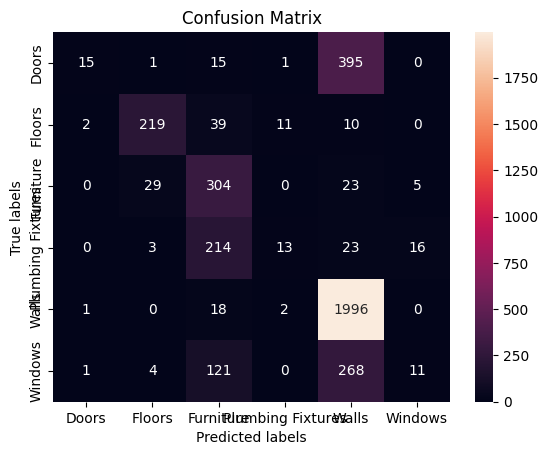

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


print('accuracy is:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
text_labels = le.inverse_transform([0, 1, 2, 3, 4, 5])
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)
